# 1 - Hold-out set cross-validation

In [26]:
import mlsauce as ms 
import numpy as np
import pandas as pd
import statsmodels.api as sm

try: 
    from statsmodels.tsa.base.datetools import dates_from_str
except ImportError:
    ModuleNotFoundError

# some example data
mdata = sm.datasets.macrodata.load_pandas().data
# prepare the dates index
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
quarterly = dates_from_str(quarterly)
mdata = mdata[['realgovt', 'tbilrate', 'cpi']]
mdata.index = pd.DatetimeIndex(quarterly)
data = np.log(mdata).diff().dropna()

n = data.shape[0]
max_idx_train = np.floor(n*0.9)
training_index = np.arange(0, max_idx_train)
testing_index = np.arange(max_idx_train, n)
df_train = data.iloc[training_index,:]
df_test = data.iloc[testing_index,:]


regr_mts = ms.LazyBoostingMTS(verbose=0, ignore_warnings=True, 
                      lags = 20, n_hidden_features=7, n_clusters=2,
                      type_pi="scp2-block-bootstrap", 
                      #kernel="gaussian",
                      replications=250, 
                      show_progress=False, preprocess=False, 
                      sort_by="WINKLERSCORE",)
models = regr_mts.fit(df_train, df_test)

print(models[["RMSE", "WINKLERSCORE", "Time Taken"]].iloc[0:25,:])

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:13<00:00,  2.20it/s]

                                                 RMSE  WINKLERSCORE  \
Model                                                                 
MTS(GenericBooster(RidgeCV))                     0.32          1.71   
MTS(GenericBooster(PassiveAggressiveRegressor))  0.34          1.78   
MTS(GenericBooster(SGDRegressor))                0.32          1.87   
MTS(GenericBooster(Ridge))                       0.35          1.93   
MTS(GenericBooster(HuberRegressor))              0.37          1.95   
MTS(GenericBooster(ElasticNet))                  0.33          1.96   
MTS(GenericBooster(Lasso))                       0.33          1.96   
MTS(GenericBooster(DummyRegressor))              0.33          1.96   
MTS(GenericBooster(LassoLars))                   0.33          1.96   
MTS(GenericBooster(DecisionTreeRegressor))       0.33          1.97   
MTS(GenericBooster(QuantileRegressor))           0.33          1.98   
MTS(GenericBooster(LassoLarsIC))                 0.33          1.99   
MTS(Ge

# 2 - Individual examples 

In [ ]:
import nnetsauce as ns

regr_ridge = ms.GenericBoostingRegressor(ms.RidgeRegressor(reg_lambda=1e3))
regr_krr = ms.GenericBoostingRegressor(ms.KRLSRegressor())

100%|██████████| 3/3 [00:00<00:00, 13.82it/s]


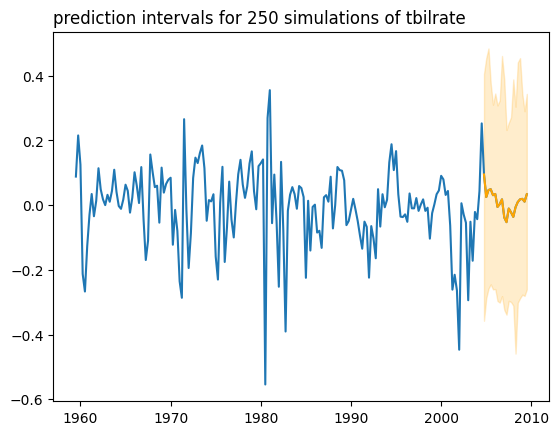

In [23]:
regr_mts = ns.MTS(regr_ridge, lags=20, replications=250,
                  type_pi="scp2-block-bootstrap")
regr_mts.fit(df_train)
regr_mts.predict(h=20)
regr_mts.plot('tbilrate')

100%|██████████| 3/3 [00:14<00:00,  4.76s/it]


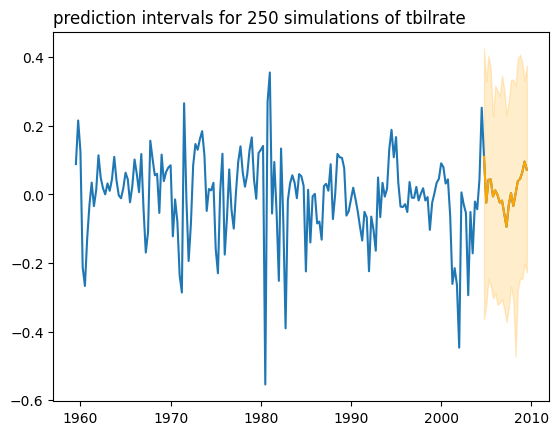

In [24]:
regr_mts = ns.MTS(regr_krr, lags=20, replications=250,
                  type_pi="scp2-block-bootstrap")
regr_mts.fit(df_train)
regr_mts.predict(h=20)
regr_mts.plot('tbilrate')